In [1]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from plotly import subplots
import plotly.figure_factory as ff
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport
import seaborn as sns
from sklearn import metrics
from scipy import stats

from copy import deepcopy

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-global-dataset/worldometer_coronavirus_daily_data.csv
/kaggle/input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv
/kaggle/input/d/gpreda/covid-world-vaccination-progress/country_vaccinations_by_manufacturer.csv
/kaggle/input/d/gpreda/covid-world-vaccination-progress/country_vaccinations.csv
/kaggle/input/countries-iso-codes-continent-flags-url/countries_continents_codes_flags_url.csv
/kaggle/input/country-mapping-iso-continent-region/continents2.csv


In [3]:
# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_blue3 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_grey2 = "#696969"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"

primary_green = px.colors.qualitative.Plotly[2]

# <p style="background-color:skyblue; font-family:newtimeroman; font-size:250%; text-align:center; border-radius: 15px 50px;">💉 COVID-19 🦠🧬 World Vaccination Progress 💉</p>

The data contains the following information:  

* **Country** - this is the country for which the vaccination information is provided;     
* **Country ISO Code** - ISO code for the country;   
* **Date**- date for the data entry; for some of the dates we have only the daily vaccinations, for others, only the (cumulative) total;   
* **Total number of vaccin ations** - this is the absolute number of total immunizations in the country;  
* **Total number of people vaccinated** - a person, depending on the immunization scheme, will receive one or more (typically 2) vaccines; at a certain moment, the number of vaccination might be larger than the number of people;  
* **Total number of people fully vaccinated** - this is the number of people that received the entire set of immunization according to the immunization scheme (typically 2); at a certain moment in time, there might be a certain number of people that received one vaccine and another number (smaller) of people that received all vaccines in the scheme;  
* **Daily vaccinations (raw)** - for a certain data entry, the number of vaccination for that date/country;  
* **Daily vaccinations** - for a certain data entry, the number of vaccination for that date/country;  
* **Total vaccinations per hundred** - ratio (in percent) between vaccination number and total population up to the date in the country;  
* **Total number of people vaccinated per hundred** - ratio (in percent) between population immunized and total population up to the date in the country;  
* **Total number of people fully vaccinated per hundred** - ratio (in percent) between population fully immunized and total population up to the date in the country;   
* **Number of vaccinations per day** - number of daily vaccination for that day and country;   
* **Daily vaccinations per million** -  ratio (in ppm) between vaccination number and total population for the current date in the country;    
* **Vaccines used in the country** - total number of vaccines used in the country (up to date);    
* **Source name** - source of the information (national authority, international organization, local organization etc.);   
* **Source website** - website of the source of information;

In [4]:
df = pd.read_csv('/kaggle/input/d/gpreda/covid-world-vaccination-progress/country_vaccinations.csv')
df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Afghanistan      AFG  2021-02-22                 0.0                0.0   
1  Afghanistan      AFG  2021-02-23                 NaN                NaN   
2  Afghanistan      AFG  2021-02-24                 NaN                NaN   
3  Afghanistan      AFG  2021-02-25                 NaN                NaN   
4  Afghanistan      AFG  2021-02-26                 NaN                NaN   

   people_fully_vaccinated  daily_vaccinations_raw  daily_vaccinations  \
0                      NaN                     NaN                 NaN   
1                      NaN                     NaN              1367.0   
2                      NaN                     NaN              1367.0   
3                      NaN                     NaN              1367.0   
4                      NaN                     NaN              1367.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             NaN                            NaN   
2                             NaN                            NaN   
3                             NaN                            NaN   
4                             NaN                            NaN   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                            35.0   
2                                  NaN                            35.0   
3                                  NaN                            35.0   
4                                  NaN                            35.0   

                                            vaccines  \
0  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
1  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
2  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
3  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   
4  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...   

                 source_name            source_website  
0  World Health Organization  https://covid19.who.int/  
1  World Health Organization  https://covid19.who.int/  
2  World Health Organization  https://covid19.who.int/  
3  World Health Organization  https://covid19.who.int/  
4  World Health Organization  https://covid19.who.int/

In [5]:
report = ProfileReport(df)

In [6]:
report

/opt/conda/lib/python3.7/site-packages/IPython/core/display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


<a id='1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">1. Data cleaning ⚙️</p>

We are going to fix some of the missings so the EDA becomes easier and clear

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17607 entries, 0 to 17606
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              17607 non-null  object 
 1   iso_code                             17607 non-null  object 
 2   date                                 17607 non-null  object 
 3   total_vaccinations                   10251 non-null  float64
 4   people_vaccinated                    9526 non-null   float64
 5   people_fully_vaccinated              7185 non-null   float64
 6   daily_vaccinations_raw               8568 non-null   float64
 7   daily_vaccinations                   17391 non-null  float64
 8   total_vaccinations_per_hundred       10251 non-null  float64
 9   people_vaccinated_per_hundred        9526 non-null   float64
 10  people_fully_vaccinated_per_hundred  7185 non-null   float64
 11  daily_vaccinations_per_milli

In [8]:
df.loc[df['iso_code'].isnull(), 'country'].value_counts()

Series([], Name: country, dtype: int64)

We can fix this easyly with imputation ('GBR') 

In [9]:
df['iso_code'] = df['iso_code'].fillna('GBR')

### Columns to drop

As we can see, 'daily_vaccinations_raw' has a cleaned variable 'daily_vaccinations' with less missing values, so we can now drop 'daily_vaccinations_raw'

In [10]:
df = df.drop('daily_vaccinations_raw', axis=1)

### Lets transform date column

In [11]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)

df['date'] = df['date'].dt.strftime('%Y-%m-%d')

In [12]:
unique_dates = df['date'].unique()

As we can see, not all of the ISO_CODEs has all the dates. So we are going to create a row for those dates with missing values.

In [13]:
original_df = df.copy()

In [14]:
for iso_code in df['iso_code'].unique():
    for inc_date in unique_dates:
        if df.loc[df['iso_code'] == iso_code, 'date'].str.contains(inc_date).any():
            continue
        else:
            df.loc[len(df)] = [None, iso_code, inc_date] + 11 * [None]

In [15]:
df.shape

(34393, 14)

Now re-order the dataframe based on '**date**' so we can plot correctly later

In [16]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)

df['date'] = df['date'].dt.strftime('%m-%d-%Y')

df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
12028  Norway      NOR  12-02-2020                 1.0                1.0   
27267    None      GNQ  12-02-2020                 NaN                NaN   
22548    None      MKD  12-02-2020                 NaN                NaN   
18443    None      LUX  12-02-2020                 NaN                NaN   
18473    None      MCO  12-02-2020                 NaN                NaN   

       people_fully_vaccinated  daily_vaccinations  \
12028                      NaN                 NaN   
27267                      NaN                 NaN   
22548                      NaN                 NaN   
18443                      NaN                 NaN   
18473                      NaN                 NaN   

       total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
12028                             0.0                            0.0   
27267                             NaN                            NaN   
22548                             NaN                            NaN   
18443                             NaN                            NaN   
18473                             NaN                            NaN   

       people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
12028                                  NaN                             NaN   
27267                                  NaN                             NaN   
22548                                  NaN                             NaN   
18443                                  NaN                             NaN   
18473                                  NaN                             NaN   

                                           vaccines  \
12028  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
27267                                          None   
22548                                          None   
18443                                          None   
18473                                          None   

                                source_name  \
12028  Norwegian Institute of Public Health   
27267                                  None   
22548                                  None   
18443                                  None   
18473                                  None   

                                          source_website  
12028  https://www.fhi.no/sv/vaksine/koronavaksinasjo...  
27267                                               None  
22548                                               None  
18443                                               None  
18473                                               None

<a id='2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">2. Data visualization 📊 by Countries</p>

Special thanks to Sharlto (https://www.kaggle.com/dwin183287/covid-19-world-vaccination) for this amazing resume chart.

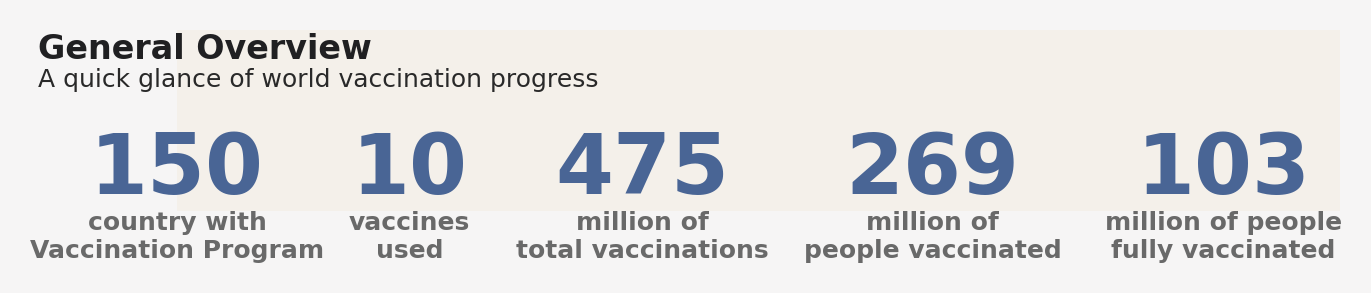

In [17]:
# I will adapt this to Plotly in future versions
plt.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(5, 0.8), facecolor='#f6f5f5')
gs = fig.add_gridspec(1, 1)
gs.update(wspace=0, hspace=0)

background_color = "#f6f5f5"

ax0 = fig.add_subplot(gs[0, 0])

ax0.set_facecolor(primary_bgcolor)
for s in ["top","right", 'left', 'bottom']:
    ax0.spines[s].set_visible(False)
ax0.set_xticks([])
ax0.set_yticks([])

ax0.grid(which='major', axis='y', zorder=0, color='#EEEEEE')
ax0.text(-0.12, 0.8, 'General Overview', color=primary_black, fontsize=8, ha='left', weight='bold', va='bottom')
ax0.text(-0.12, 0.79, 'A quick glance of world vaccination progress', color='#292929', fontsize=6, ha='left', va='top')

ax0.text(0, 0, '150', color=primary_blue, fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0, 0, 'country with\nVaccination Program', color=primary_grey2, fontsize=6, ha='center', va='top', weight='bold')

ax0.text(0.2, 0, '10', color=primary_blue, fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.2, 0, 'vaccines\nused', color=primary_grey2, fontsize=6, ha='center', va='top', weight='bold')

ax0.text(0.4, 0, '475', color=primary_blue, fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.4, 0, 'million of\ntotal vaccinations', color=primary_grey2, fontsize=6, ha='center', va='top', weight='bold')

ax0.text(0.65, 0, '269', color=primary_blue, fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.65, 0, 'million of\npeople vaccinated', color=primary_grey2, fontsize=6, ha='center', va='top', weight='bold')

ax0.text(0.9, 0, '103', color=primary_blue, fontsize=20, ha='center', weight='bold', va='bottom')
ax0.text(0.9, 0, 'million of people\nfully vaccinated', color=primary_grey2, fontsize=6, ha='center', va='top', weight='bold')

plt.show()

<a id='2.1'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">2.1 Distribution of vaccinations by country</p>

We have to fill the missing with forward filling method from pandas.

As ***people_fully_vaccinated*** has many missings and the values are only for low number of countries, we are note going to plot.

In [18]:
tdf = df.copy()


for iso_code in tdf['iso_code'].unique():
    tdf.loc[tdf['iso_code'] == iso_code, :] = tdf.loc[tdf['iso_code'] == iso_code, :].fillna(method='ffill').fillna(0)


In [19]:
fig = px.choropleth(
    tdf,                            # Input Dataframe
    locations="iso_code",           # identify country code column
    color="total_vaccinations",                     # identify representing column
    hover_name="country",              # identify hover name
    animation_frame="date",
    #category_orders={"frame": list(sorted(tdf['date'].unique()))},            # identify date column
    color_continuous_scale= 'viridis',
    projection="natural earth",        # select projection
    range_color=[0,5000000],
    title='<span style="font-size:36px; font-family:Times New Roman">Number of vaccinations per country</span>',
)             # select range of dataset     
fig.show() 

In [20]:
fig = px.choropleth(
    tdf,                            # Input Dataframe
    locations="iso_code",           # identify country code column
    color="daily_vaccinations",                     # identify representing column
    hover_name="country",              # identify hover name
    animation_frame="date",
    #category_orders={"frame": list(sorted(tdf['date'].unique()))},            # identify date column
    color_continuous_scale= 'viridis',
    projection="natural earth",        # select projection
    range_color=[0,1000000],
    title='<span style="font-size:36px; font-family:Times New Roman">Number of daily vaccinations</span>',
)             # select range of dataset     
fig.show() 

<a id='2.2'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">2.2 Top vaccines Laboratories</p>

In [21]:
tdf = df.copy()
tdf = tdf.dropna(subset=['vaccines'])

vac_df = tdf.groupby(['iso_code','vaccines']).max().reset_index()
vac_df['vaccines_split'] = vac_df['vaccines'].apply(lambda x: [w.strip() for w in x.split(',')])
vac_df.head()

iso_code                                           vaccines      country  \
0      ABW                                    Pfizer/BioNTech        Aruba   
1      AFG  Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...  Afghanistan   
2      AGO                                 Oxford/AstraZeneca       Angola   
3      AIA                                 Oxford/AstraZeneca     Anguilla   
4      ALB  Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, ...      Albania   

         date  total_vaccinations  people_vaccinated  people_fully_vaccinated  \
0  05-13-2021             85441.0            56932.0                  28509.0   
1  05-11-2021            504502.0           448878.0                  55624.0   
2  05-12-2021            626572.0           586377.0                  40195.0   
3  04-22-2021              6898.0             6115.0                    783.0   
4  05-12-2021            632676.0           444755.0                 187921.0   

   daily_vaccinations  total_vaccinations_per_hundred  \
0              2493.0                           80.03   
1             13921.0                            1.30   
2             18751.0                            1.91   
3               331.0                           45.98   
4             17565.0                           21.98   

   people_vaccinated_per_hundred  people_fully_vaccinated_per_hundred  \
0                          53.32                                26.70   
1                           1.15                                 0.14   
2                           1.78                                 0.12   
3                          40.76                                 5.22   
4                          15.45                                 6.53   

   daily_vaccinations_per_million                source_name  \
0                         23350.0        Government of Aruba   
1                           358.0  World Health Organization   
2                           571.0  World Health Organization   
3                         22064.0         Ministry of Health   
4                          6104.0         Ministry of Health   

                                      source_website  \
0                          https://www.government.aw   
1                           https://covid19.who.int/   
2                           https://covid19.who.int/   
3  https://www.travelpulse.com/news/impacting-tra...   
4  https://shendetesia.gov.al/vaksinimi-anticovid...   

                                      vaccines_split  
0                                  [Pfizer/BioNTech]  
1  [Oxford/AstraZeneca, Pfizer/BioNTech, Sinophar...  
2                               [Oxford/AstraZeneca]  
3                               [Oxford/AstraZeneca]  
4  [Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac,...

In [22]:
from sklearn.preprocessing import MultiLabelBinarizer

one_hot = MultiLabelBinarizer()

vac_data = one_hot.fit_transform(vac_df['vaccines_split'])
vac_names = one_hot.classes_
vac_countries = vac_df['country']

final_vac_df = pd.DataFrame(data=vac_data, columns=vac_names, index=vac_countries)
final_vac_df = final_vac_df.reset_index()
final_vac_df.head()

country  Abdala  CanSino  Covaxin  EpiVacCorona  Johnson&Johnson  \
0        Aruba       0        0        0             0                0   
1  Afghanistan       0        0        0             0                0   
2       Angola       0        0        0             0                0   
3     Anguilla       0        0        0             0                0   
4      Albania       0        0        0             0                0   

   Moderna  Oxford/AstraZeneca  Pfizer/BioNTech  Sinopharm/Beijing  \
0        0                   0                1                  0   
1        0                   1                1                  1   
2        0                   1                0                  0   
3        0                   1                0                  0   
4        0                   1                1                  0   

   Sinopharm/Wuhan  Sinovac  Sputnik V  
0                0        0          0  
1                0        0          0  
2                0        0          0  
3                0        0          0  
4                0        1          1

In [23]:
ncountrys_vac = final_vac_df[vac_names].sum(axis=0).sort_values()
colors =  [primary_grey]*4 + [primary_blue2]*4 + [primary_blue]*2 


fig = go.Figure(go.Bar(
    x = ncountrys_vac.values,
    y = ncountrys_vac.index,
    orientation = 'h',
))
fig.update_traces(
    marker_color=colors,
    marker_line_color=primary_black,
    marker_line_width=1.5, 
    opacity=0.6,
)
fig.update_layout(
    title='<span style="font-size:36px; font-family:Times New Roman">Vaccines laboratory distribution by countries</span>',
)

'''
fig.add_layout_image(
    dict(
        source='https://upload.wikimedia.org/wikipedia/commons/9/9a/Flag_of_Afghanistan.svg',
        x=35, y="Moderna",
        sizex=2.5, sizey=0.75,
        xanchor="left", yanchor="middle",
        sizing='stretch',
        xref='x',
        yref="y",
    )
)
'''

fig.show()

<a id='2.3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:120%; text-align:center; border-radius: 15px 50px;">2.3 Distribution of vaccinatios by country</p>

In [24]:
regions_df = pd.read_csv('/kaggle/input/countries-iso-codes-continent-flags-url/countries_continents_codes_flags_url.csv')
full_df = df.merge(regions_df[['alpha-3', 'region', 'image_url']], left_on='iso_code', right_on='alpha-3')

world_summary_df = pd.read_csv('/kaggle/input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv')
full_df = full_df.merge(world_summary_df, on='country', how='left')
full_df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Norway      NOR  12-02-2020                 1.0                1.0   
1  Norway      NOR  12-03-2020                 1.0                1.0   
2  Norway      NOR  12-04-2020                 2.0                2.0   
3  Norway      NOR  12-05-2020                 2.0                2.0   
4  Norway      NOR  12-06-2020                 2.0                2.0   

   people_fully_vaccinated  daily_vaccinations  \
0                      NaN                 NaN   
1                      NaN                 0.0   
2                      NaN                 0.0   
3                      NaN                 0.0   
4                      NaN                 0.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   people_fully_vaccinated_per_hundred  ...  total_confirmed total_deaths  \
0                                  NaN  ...         119500.0        774.0   
1                                  NaN  ...         119500.0        774.0   
2                                  NaN  ...         119500.0        774.0   
3                                  NaN  ...         119500.0        774.0   
4                                  NaN  ...         119500.0        774.0   

  total_recovered active_cases serious_or_critical  \
0         88952.0      29774.0                21.0   
1         88952.0      29774.0                21.0   
2         88952.0      29774.0                21.0   
3         88952.0      29774.0                21.0   
4         88952.0      29774.0                21.0   

  total_cases_per_1m_population total_deaths_per_1m_population total_tests  \
0                       21893.0                          142.0   5423294.0   
1                       21893.0                          142.0   5423294.0   
2                       21893.0                          142.0   5423294.0   
3                       21893.0                          142.0   5423294.0   
4                       21893.0                          142.0   5423294.0   

   total_tests_per_1m_population  population  
0                       993583.0   5458320.0  
1                       993583.0   5458320.0  
2                       993583.0   5458320.0  
3                       993583.0   5458320.0  
4                       993583.0   5458320.0  

[5 rows x 28 columns]

In [25]:
full_df['total_deaths_ratio'] = full_df['total_deaths'] / full_df['population']
full_df['total_confirmed_ratio'] = full_df['total_confirmed'] / full_df['population']
full_df['total_recovered_ratio'] = full_df['total_recovered'] / full_df['population']

world_summary_df['total_deaths_ratio'] = world_summary_df['total_deaths'] / world_summary_df['population']
world_summary_df['total_confirmed_ratio'] = world_summary_df['total_confirmed'] / world_summary_df['population']
world_summary_df['total_recovered_ratio'] = world_summary_df['total_recovered'] / world_summary_df['population']

In [26]:
def get_multi_line_title(title:str, subtitle:str):
    return f'<span style="font-size:32px; font-family:Times New Roman">{title}<br><sub>{subtitle}</sub></span>'

# Thanks to 
def plotly_bar_chart(data: pd.DataFrame, xcolumn: str, ycolumn:str, title:str, colors:str, ylabel="Count", n=None):
    hovertemplate ='<br><b>%{x}</b>'+f'<br><b>{ylabel}: </b>'+'%{y}<br><extra></extra>'    
    data = data.sort_values(ycolumn, ascending=False).dropna(subset=[ycolumn])        
    
    if n is not None: 
        data = data.iloc[:n]
    else:
        n = ""
    fig = go.Figure(go.Bar(
        hoverinfo='skip',
        x=data[xcolumn], 
        y=data[ycolumn], 
        hovertemplate = hovertemplate,
        marker=dict(
            color = data[ycolumn],
            colorscale=colors,
        ),
    ))
    
    max_y_val = data[ycolumn].max()
    for country, flag_url, ppl_vac in zip(data[xcolumn], data['image_url'], data[ycolumn]):
        if not flag_url or not isinstance(flag_url, str):
            continue
        fig.add_layout_image(
            dict(
                source=flag_url,
                x=country, 
                y=ppl_vac + 0.05 * max_y_val,
                sizex=0.5, 
                sizey=0.08 * max_y_val,
                xanchor="center", yanchor="bottom",
                sizing='stretch',
                xref='x',
                yref="y",
            ),
        )
    
    fig.update_yaxes(range=[0, max_y_val + 0.15*max_y_val])
    
    fig.update_layout(
        title=title,
        xaxis_title=f"Top {n} {xcolumn.title()}",
        yaxis_title=ylabel,
        plot_bgcolor='rgba(0,0,0,0)',
        hovermode="x",
    )
    
    fig.show()

In [27]:
tdf = full_df.sort_values('people_vaccinated', ascending=False).\
    drop_duplicates(subset=['country'], keep='first', ignore_index=True)
tdf.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0   United States      USA  05-13-2021         266596486.0        154624231.0   
1           India      IND  05-13-2021         178361846.0        139087590.0   
2  United Kingdom      GBR  05-12-2021          54797640.0         35906671.0   
3          Brazil      BRA  05-13-2021          50308106.0         34092728.0   
4         Germany      DEU  05-13-2021          38646171.0         29891651.0   

   people_fully_vaccinated  daily_vaccinations  \
0              118987308.0           2088962.0   
1               39274256.0           2251178.0   
2               18890969.0            510250.0   
3               16215378.0            537959.0   
4                8822370.0            710076.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                           79.71                          46.23   
1                           12.92                          10.08   
2                           80.72                          52.89   
3                           23.67                          16.04   
4                           46.13                          35.68   

   people_fully_vaccinated_per_hundred  ...  active_cases serious_or_critical  \
0                                35.58  ...           NaN                 NaN   
1                                 2.85  ...     3353733.0              8944.0   
2                                27.83  ...           NaN                 NaN   
3                                 7.63  ...     1071811.0              8318.0   
4                                10.53  ...      220722.0              4123.0   

  total_cases_per_1m_population total_deaths_per_1m_population  total_tests  \
0                           NaN                            NaN          NaN   
1                       18126.0                          200.0  318292881.0   
2                           NaN                            NaN          NaN   
3                       73223.0                         2043.0   47073060.0   
4                       42946.0                         1034.0   58093759.0   

  total_tests_per_1m_population    population total_deaths_ratio  \
0                           NaN           NaN                NaN   
1                      228681.0  1.391864e+09           0.000200   
2                           NaN           NaN                NaN   
3                      220090.0  2.138813e+08           0.002043   
4                      691439.0  8.401860e+07           0.001034   

   total_confirmed_ratio  total_recovered_ratio  
0                    NaN                    NaN  
1               0.018126               0.015516  
2                    NaN                    NaN  
3               0.073223               0.066170  
4               0.042946               0.039285  

[5 rows x 31 columns]

In [28]:
title = get_multi_line_title("People Vaccinated", "Individuals who received the first dose of the vaccine")
plotly_bar_chart(tdf, 'country', "people_vaccinated", title, "Blugrn", n=10)

In [29]:
tdf = full_df.copy()
tdf = tdf.sort_values('people_vaccinated_per_hundred', ascending=False).\
    drop_duplicates(subset=['country'], keep='first', ignore_index=True)

In [30]:
title = get_multi_line_title("People Vaccinated per Hundred", "Percent of individuals who received the first dose of the vaccine")
plotly_bar_chart(tdf, 'country', "people_vaccinated_per_hundred", title, "Blugrn", n=10, ylabel='Percent')

In [31]:
tdf = full_df.copy()
tdf = tdf.sort_values('total_vaccinations', ascending=False).\
    drop_duplicates(subset=['country'], keep='first', ignore_index=True)

In [32]:
title = get_multi_line_title("Total Vaccinations", "Total number of vaccinations by country")
plotly_bar_chart(tdf, 'country', "total_vaccinations", title, "Purp", n=10)

In [33]:
tdf = full_df.copy()
tdf = tdf.sort_values('total_vaccinations_per_hundred', ascending=False).\
    drop_duplicates(subset=['country'], keep='first', ignore_index=True)

In [34]:
title = get_multi_line_title("Total Vaccinations per Hundred", "Ratio between vaccination number and total population up to the date in the country;")
plotly_bar_chart(tdf, 'country', "total_vaccinations_per_hundred", title, "Purp", n=10)

<a id='3'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">3. Data visualization 📊 by Continent</p>

In this case, I think that percent of people vaccinated per hundred is the most representative value so I will only plot this values.

In [35]:
regions_df = pd.read_csv('/kaggle/input/countries-iso-codes-continent-flags-url/countries_continents_codes_flags_url.csv')

regions_df.head()

country              images_file  \
0  Afghanistan  Flag_of_Afghanistan.svg   
1      Albania      Flag_of_Albania.svg   
2      Algeria      Flag_of_Algeria.svg   
3      Andorra      Flag_of_Andorra.svg   
4       Angola       Flag_of_Angola.svg   

                                           image_url alpha-2 alpha-3  \
0  https://upload.wikimedia.org/wikipedia/commons...      AF     AFG   
1  https://upload.wikimedia.org/wikipedia/commons...      AL     ALB   
2  https://upload.wikimedia.org/wikipedia/commons...      DZ     DZA   
3  https://upload.wikimedia.org/wikipedia/commons...      AD     AND   
4  https://upload.wikimedia.org/wikipedia/commons...      AO     AGO   

   country-code     iso_3166-2  region          sub-region  \
0           4.0  ISO 3166-2:AF    Asia       Southern Asia   
1           8.0  ISO 3166-2:AL  Europe     Southern Europe   
2          12.0  ISO 3166-2:DZ  Africa     Northern Africa   
3          20.0  ISO 3166-2:AD  Europe     Southern Europe   
4          24.0  ISO 3166-2:AO  Africa  Sub-Saharan Africa   

  intermediate-region  region-code  sub-region-code  intermediate-region-code  
0                 NaN        142.0             34.0                       NaN  
1                 NaN        150.0             39.0                       NaN  
2                 NaN          2.0             15.0                       NaN  
3                 NaN        150.0             39.0                       NaN  
4       Middle Africa          2.0            202.0                      17.0

In [36]:
tdf = df.merge(regions_df[['alpha-3', 'region', 'image_url']], left_on='iso_code', right_on='alpha-3')
tdf.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Norway      NOR  12-02-2020                 1.0                1.0   
1  Norway      NOR  12-03-2020                 1.0                1.0   
2  Norway      NOR  12-04-2020                 2.0                2.0   
3  Norway      NOR  12-05-2020                 2.0                2.0   
4  Norway      NOR  12-06-2020                 2.0                2.0   

   people_fully_vaccinated  daily_vaccinations  \
0                      NaN                 NaN   
1                      NaN                 0.0   
2                      NaN                 0.0   
3                      NaN                 0.0   
4                      NaN                 0.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                             0.0   
2                                  NaN                             0.0   
3                                  NaN                             0.0   
4                                  NaN                             0.0   

                                       vaccines  \
0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
1  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
3  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
4  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   

                            source_name  \
0  Norwegian Institute of Public Health   
1  Norwegian Institute of Public Health   
2  Norwegian Institute of Public Health   
3  Norwegian Institute of Public Health   
4  Norwegian Institute of Public Health   

                                      source_website alpha-3  region  \
0  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
1  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
2  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
3  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
4  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   

                                           image_url  
0  https://upload.wikimedia.org/wikipedia/commons...  
1  https://upload.wikimedia.org/wikipedia/commons...  
2  https://upload.wikimedia.org/wikipedia/commons...  
3  https://upload.wikimedia.org/wikipedia/commons...  
4  https://upload.wikimedia.org/wikipedia/commons...

In [37]:
continents_tdf = tdf.sort_values('people_vaccinated_per_hundred', ascending=False).\
    drop_duplicates(subset=['country'], keep='first', ignore_index=True)

continents_tdf.head()

country iso_code        date  total_vaccinations  \
0         Gibraltar      GIB  05-07-2021             74256.0   
1  Falkland Islands      FLK  04-14-2021              4407.0   
2       Isle of Man      IMN  05-12-2021             76977.0   
3        Seychelles      SYC  05-05-2021            128919.0   
4        San Marino      SMR  05-12-2021             36735.0   

   people_vaccinated  people_fully_vaccinated  daily_vaccinations  \
0            38727.0                  35529.0               449.0   
1             2632.0                   1775.0                12.0   
2            61081.0                  15896.0               391.0   
3            68512.0                  60407.0               483.0   
4            21612.0                  15123.0               693.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                          220.40                         114.95   
1                          126.53                          75.57   
2                           90.53                          71.83   
3                          131.10                          69.67   
4                          108.24                          63.68   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                               105.46                         13327.0   
1                                50.96                          3445.0   
2                                18.69                          4598.0   
3                                61.43                          4912.0   
4                                44.56                         20420.0   

                                vaccines                          source_name  \
0                        Pfizer/BioNTech              Government of Gibraltar   
1                     Oxford/AstraZeneca   Government of the Falkland Islands   
2    Oxford/AstraZeneca, Pfizer/BioNTech               Isle of Man Government   
3  Oxford/AstraZeneca, Sinopharm/Beijing  Extended Programme for Immunisation   
4             Pfizer/BioNTech, Sputnik V            Social Security Institute   

                                      source_website alpha-3    region  \
0  https://twitter.com/GibraltarGov/status/139098...     GIB    Europe   
1  https://www.facebook.com/FalkIandsGov/posts/44...     FLK  Americas   
2  https://covid19.gov.im/general-information/cov...     IMN    Europe   
3  https://www.facebook.com/mohseychellesofficial...     SYC    Africa   
4                       https://vaccinocovid.iss.sm/     SMR    Europe   

                                           image_url  
0  https://upload.wikimedia.org/wikipedia/commons...  
1  https://upload.wikimedia.org/wikipedia/commons...  
2  https://upload.wikimedia.org/wikipedia/commons...  
3  https://upload.wikimedia.org/wikipedia/commons...  
4  https://upload.wikimedia.org/wikipedia/commons...

In [38]:
continents = ['Europe', 'Africa', 'Asia', 'Americas']

# Initialize figure
fig = go.Figure()

for continent in continents:
    temp_df = continents_tdf.query(f'region == "{continent}"')
    temp_df = temp_df.sort_values('people_vaccinated_per_hundred', ascending=False).iloc[:5]
    
    # Add Traces
    fig.add_trace(
        go.Bar(
            y=temp_df['people_vaccinated_per_hundred'],
            x=temp_df['country'],
            name=continent,
            marker={'color': temp_df['people_vaccinated_per_hundred'], 'colorscale': 'tealgrn'},
            visible=True if continent == 'Europe' else False
        )
    )
    
buttons = []
for i, continent in enumerate(continents):
    buttons.append(dict(
        label=continent,
        method="update",
        args=[{"visible": [False] * i + [True] + [False] * (2-i+1)},
              {"title": f"Top 5 countries for {continent}"}]
    ))
    
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=0.57,
            y=1.2,
            buttons=buttons,
        )
    ])

# Set title
fig.update_layout(
    title_text="Top 5 Publishers per region",
    xaxis_domain=[0.05, 1.0]
)

fig.show()

<a id='3.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">3.1 World Map: vaccinations distribution</p>

In [39]:
tdf = world_summary_df.sort_values('total_deaths_ratio', ascending=False).\
    drop_duplicates(subset=['country'], keep='first', ignore_index=True)
tdf.head()

tdf = tdf.dropna(subset=['total_deaths_ratio'])

In [40]:
# Thanks to https://www.kaggle.com/ivannatarov for the idea
fig = px.scatter_geo(
         tdf, # Passing the dataframe
         locations='country', # Select the column with the name of the countries
         color='continent',
         locationmode='country names', # We pass the parameter of determining the country on the map (by name)
         hover_name='country',  # Passing values for the signature on hover
         size='total_deaths_ratio' # Passing a column with values
)

fig.update_layout(
    # Set the name of the map
    title_text='Deaths ration by country <br><sub>Total number of deaths divided by the population</sub>',
    legend_orientation='h', # Place the legend caption under the chart
    legend_title_text='', # Remove the name of the legend group
    # Determine the map display settings (remove the frame, etc.)
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
    # Setting parameters for the text
    font=dict(
       family='TimesNewRoman',
       size=18, 
       color='black'
    )
)

fig.show()

In [41]:
tdf = world_summary_df.sort_values('total_confirmed_ratio', ascending=False).\
    drop_duplicates(subset=['country'], keep='first', ignore_index=True)
tdf.head()

tdf = tdf.dropna(subset=['total_confirmed_ratio'])

In [42]:
# Thanks to https://www.kaggle.com/ivannatarov for the idea
fig = px.scatter_geo(
         tdf, # Passing the dataframe
         locations='country', # Select the column with the name of the countries
         color='continent',
         locationmode='country names', # We pass the parameter of determining the country on the map (by name)
         hover_name='country',  # Passing values for the signature on hover
         size='total_confirmed_ratio' # Passing a column with values
)

fig.update_layout(
    # Set the name of the map
    title_text='Confirmed cases ration by country <br><sub>Total number of confirmed cases divided by the population</sub>',
    legend_orientation='h', # Place the legend caption under the chart
    legend_title_text='', # Remove the name of the legend group
    # Determine the map display settings (remove the frame, etc.)
    geo=dict(
       showframe=False,
       showcoastlines=False,
       projection_type='equirectangular'
    ),
    # Setting parameters for the text
    font=dict(
       family='TimesNewRoman',
       size=18, 
       color='black'
    )
)

fig.show()

<a id='4'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">4. World Summary</p>

In [43]:
world_summary_df.head()

country continent  total_confirmed  total_deaths  total_recovered  \
0  Afghanistan      Asia            63819        2751.0            55010   
1      Albania    Europe           132032        2435.0           125419   
2      Algeria    Africa           125485        3381.0            87476   
3      Andorra    Europe            13555         127.0            13211   
4       Angola    Africa            30787         677.0            25995   

   active_cases  serious_or_critical  total_cases_per_1m_population  \
0          6058               1124.0                           1608   
1          4178                 18.0                          45924   
2         34628                 28.0                           2817   
3           217                 12.0                         175190   
4          4115                 22.0                            912   

   total_deaths_per_1m_population  total_tests  total_tests_per_1m_population  \
0                            69.0     432676.0                        10901.0   
1                           847.0     677041.0                       235489.0   
2                            76.0     230861.0                         5183.0   
3                          1641.0     193595.0                      2502100.0   
4                            20.0     527590.0                        15631.0   

   population  total_deaths_ratio  total_confirmed_ratio  \
0    39691394            0.000069               0.001608   
1     2875041            0.000847               0.045924   
2    44541312            0.000076               0.002817   
3       77373            0.001641               0.175190   
4    33753337            0.000020               0.000912   

   total_recovered_ratio  
0               0.001386  
1               0.043623  
2               0.001964  
3               0.170744  
4               0.000770

In [44]:
corrdata = world_summary_df.drop(columns=['country', 'continent'])

## correlation 
corr = corrdata.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr1 = corr.mask(mask)

fig = ff.create_annotated_heatmap(
    z=corr1.to_numpy().round(2),
    x=list(corr1.index.values),
    y=list(corr1.columns.values),       
    xgap=3, ygap=3,
    zmin=0, zmax=1,
    colorscale='blugrn',
    colorbar_thickness=30,
    colorbar_ticklen=3,
)

fig.update_layout(
    title_text='<span style="font-size:32px; font-family:Times New Roman">Features Correlation Matrix</span>', 
    font_family="Serif",
    titlefont={'size': 24},
    width=800, height=700,
    xaxis={'side': 'bottom'},
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    yaxis_autorange='reversed', 
    paper_bgcolor=primary_bgcolor,
    plot_bgcolor=primary_bgcolor,
    margin=dict(l=70, r=70, t=70, b=70, pad=1),
)
fig.update_xaxes(
    ticklabelposition="outside bottom",
)

fig.show()

<a id='4.1'></a>
## <p style="background-color:skyblue; font-family:newtimeroman; font-size:140%; text-align:center; border-radius: 15px 50px;">4.1 Confirmed cases evolution by continent</p>

In [45]:
regions_df = pd.read_csv('/kaggle/input/countries-iso-codes-continent-flags-url/countries_continents_codes_flags_url.csv')
full_df = original_df.merge(regions_df[['alpha-3', 'region', 'image_url']], left_on='iso_code', right_on='alpha-3')

full_df.head()

country iso_code        date  total_vaccinations  people_vaccinated  \
0  Norway      NOR  2020-12-02                 1.0                1.0   
1  Norway      NOR  2020-12-03                 1.0                1.0   
2  Norway      NOR  2020-12-04                 2.0                2.0   
3  Norway      NOR  2020-12-05                 2.0                2.0   
4  Norway      NOR  2020-12-06                 2.0                2.0   

   people_fully_vaccinated  daily_vaccinations  \
0                      NaN                 NaN   
1                      NaN                 0.0   
2                      NaN                 0.0   
3                      NaN                 0.0   
4                      NaN                 0.0   

   total_vaccinations_per_hundred  people_vaccinated_per_hundred  \
0                             0.0                            0.0   
1                             0.0                            0.0   
2                             0.0                            0.0   
3                             0.0                            0.0   
4                             0.0                            0.0   

   people_fully_vaccinated_per_hundred  daily_vaccinations_per_million  \
0                                  NaN                             NaN   
1                                  NaN                             0.0   
2                                  NaN                             0.0   
3                                  NaN                             0.0   
4                                  NaN                             0.0   

                                       vaccines  \
0  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
1  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
2  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
3  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   
4  Moderna, Oxford/AstraZeneca, Pfizer/BioNTech   

                            source_name  \
0  Norwegian Institute of Public Health   
1  Norwegian Institute of Public Health   
2  Norwegian Institute of Public Health   
3  Norwegian Institute of Public Health   
4  Norwegian Institute of Public Health   

                                      source_website alpha-3  region  \
0  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
1  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
2  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
3  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   
4  https://www.fhi.no/sv/vaksine/koronavaksinasjo...     NOR  Europe   

                                           image_url  
0  https://upload.wikimedia.org/wikipedia/commons...  
1  https://upload.wikimedia.org/wikipedia/commons...  
2  https://upload.wikimedia.org/wikipedia/commons...  
3  https://upload.wikimedia.org/wikipedia/commons...  
4  https://upload.wikimedia.org/wikipedia/commons...

In [46]:
vaccination_progress_df = full_df.groupby(['region', 'date']).agg({'people_vaccinated': 'sum', 'daily_vaccinations': 'sum', 'people_vaccinated_per_hundred': 'sum'})
vaccination_progress_df = vaccination_progress_df.reset_index().sort_values('date')
vaccination_progress_df = vaccination_progress_df.query('date > "2021-01-03" and date < "2021-04-27"')
vaccination_progress_df.head()

region        date  people_vaccinated  daily_vaccinations  \
146  Americas  2021-01-04          4616274.0            371343.0   
296      Asia  2021-01-04          1506466.0            500896.0   
459    Europe  2021-01-04           896214.0            346851.0   
147  Americas  2021-01-05          4895202.0            364832.0   
297      Asia  2021-01-05          1635614.0            541331.0   

     people_vaccinated_per_hundred  
146                           1.44  
296                          20.40  
459                           4.32  
147                           1.54  
297                          22.01

In [47]:
fig = go.Figure()
for region in vaccination_progress_df['region'].unique():
    fig.add_traces(go.Scatter(
        x = vaccination_progress_df.query(f'region == "{region}"')['date'],
        y = vaccination_progress_df.query(f'region == "{region}"')['people_vaccinated'],
        fill = 'tozeroy',
        mode = 'lines',
        name = region,
    ))
    
fig.update_layout(
    # Set the name of the map
    title_text='People vaccinated over time <br><sub>Total number of persons vaccinated between 03/01 and 27/04</sub>',
    font=dict(
       family='Serif',
       size=18, 
       color='black'
    )
)
fig.show()

In [48]:
fig = px.area(vaccination_progress_df, x='date', y='people_vaccinated_per_hundred', color='region')
fig.update_layout(
    # Set the name of the map
    title_text='People vaccinated per hundred over time',
    font=dict(
       family='Serif',
       size=18, 
       color='black'
    )
)
fig.show()

<a id='5'></a>
# <p style="background-color:skyblue; font-family:newtimeroman; font-size:150%; text-align:center; border-radius: 15px 50px;">5. Covid World Dataset</p>

In [49]:
covid_cum = pd.read_csv('../input/covid19-global-dataset/worldometer_coronavirus_summary_data.csv')
covid_cum.head()

country continent  total_confirmed  total_deaths  total_recovered  \
0  Afghanistan      Asia            63819        2751.0            55010   
1      Albania    Europe           132032        2435.0           125419   
2      Algeria    Africa           125485        3381.0            87476   
3      Andorra    Europe            13555         127.0            13211   
4       Angola    Africa            30787         677.0            25995   

   active_cases  serious_or_critical  total_cases_per_1m_population  \
0          6058               1124.0                           1608   
1          4178                 18.0                          45924   
2         34628                 28.0                           2817   
3           217                 12.0                         175190   
4          4115                 22.0                            912   

   total_deaths_per_1m_population  total_tests  total_tests_per_1m_population  \
0                            69.0     432676.0                        10901.0   
1                           847.0     677041.0                       235489.0   
2                            76.0     230861.0                         5183.0   
3                          1641.0     193595.0                      2502100.0   
4                            20.0     527590.0                        15631.0   

   population  
0    39691394  
1     2875041  
2    44541312  
3       77373  
4    33753337

In [50]:
countries= ['Spain', 'France', 'Germany', 'Turkey', 'UK', 'Italy']
europe_mortality = covid_cum[covid_cum['country'].isin(countries)].sort_values('total_deaths_per_1m_population')

fig = go.Figure(go.Bar(
    x=europe_mortality['total_deaths_per_1m_population'],
    y=europe_mortality['country'],
    orientation='h',
    marker={'color': europe_mortality['total_deaths_per_1m_population'], 'colorscale': 'tealgrn'},
) ,layout=go.Layout(height=400, width=700))
# Customize aspect
fig.update_traces(
    # marker_color='rgb(158,202,225)', 
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5, 
    opacity=0.6,
)
fig.update_layout(
    title_text="<span style='font-size:30px; font-family:Serif'>Mortality rate - Some European countries</span>",
    xaxis_title='Total deaths per 1m population',
)

In [51]:
countries= ['Spain', 'France', 'Germany', 'Turkey', 'UK', 'Italy']
europe_cases = covid_cum[covid_cum['country'].isin(countries)].sort_values('total_cases_per_1m_population')

fig = go.Figure(go.Bar(
    x=europe_cases['total_cases_per_1m_population'],
    y=europe_cases['country'],
    orientation='h',
    marker={'color': europe_cases['total_cases_per_1m_population'], 'colorscale': 'tealgrn'},
) ,layout=go.Layout(height=400, width=700))
# Customize aspect
fig.update_traces(
    # marker_color='rgb(158,202,225)', 
    marker_line_color='rgb(8,48,107)',
    marker_line_width=1.5, 
    opacity=0.6,
)
fig.update_layout(
    title_text="<span style='font-size:30px; font-family:Serif'>Mortality rate - Some European countries</span>",
    xaxis_title='Total cases per 1m population',
)